## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
study_results_df['Mouse ID'] = study_results_df['Mouse ID'].astype('string')
mouse_metadata_df['Mouse ID'] = mouse_metadata_df['Mouse ID'].astype('string')

In [5]:
# Combine the data into a single dataset
data_df = study_results_df.merge(mouse_metadata_df, on='Mouse ID', how ='left')
# Display the data table for preview
data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
data_df['Mouse ID'].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
data_dups_df = data_df[data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
data_dups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df = data_df[data_df['Mouse ID'] != 'g989']

In [9]:
# Checking the number of mice in the clean DataFrame.
data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
dr_mean = data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
dr_median = data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
dr_var = data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
dr_sd = data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
dr_sem = data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


In [11]:
dr_summ_df = pd.concat([dr_mean, dr_median, dr_var, dr_sd, dr_sem], axis=1)
dr_summ_df.columns=['Volume Mean (mm3)', 'Volume Median (mm3)', 'Volume Variance (mm3)', 'Volume Std Dev (mm3)', 'Volume SEM (mm3)']
dr_summ_df

,Volume Mean (mm3),Volume Median (mm3),Volume Variance (mm3),Volume Std Dev (mm3),Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#/LOGAN - I'm not really sure what this is asking to do, the way I'm reading it, that has already been achieved.

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

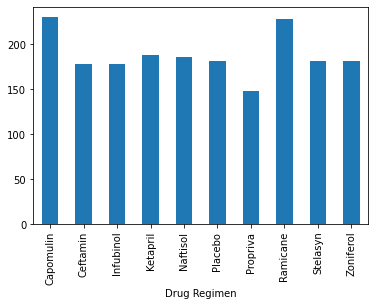

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

dr = data_df.groupby('Drug Regimen')
dr_count = dr['Drug Regimen'].count()
dr_count.plot(kind='bar')

In [14]:
dr_count_df = pd.DataFrame(dr_count)
dr_count_df.columns=['Count']

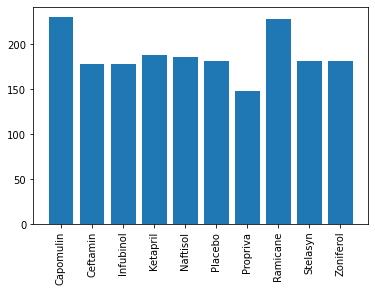

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(dr_count_df.index, dr_count_df['Count'])
plt.xticks(rotation=90)
plt.show()

In [16]:
sex_df = mouse_metadata_df.groupby('Sex').count()

<AxesSubplot:ylabel='Sex'>

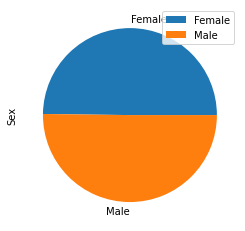

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df.plot(sex_df['Mouse ID'], 1, kind='pie', ylabel='Sex')

<function matplotlib.pyplot.show(close=None, block=None)>

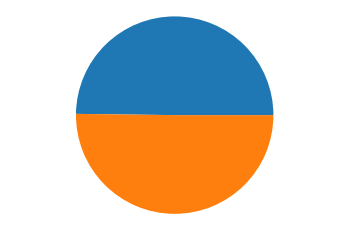

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
ax1.pie(sex_df['Mouse ID'])
ax1.axis('equal')
plt.show

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = data_df.groupby('Mouse ID').Timepoint.max()
max_time_df = pd.DataFrame(max_time_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxmerge_df = max_time_df.merge(data_df, how ='inner', on = ['Mouse ID', 'Timepoint'])
maxmerge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
import numpy as np

In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
t_vol_Capomulin = []
t_vol_Ramicane = []
t_vol_Infubinol = []
t_vol_Ceftamin = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in maxmerge_df.index:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment = maxmerge_df.iloc[x,4]
    checkCa = treatment.count('Capomulin')
    checkR = treatment.count('Ramicane')
    checkI = treatment.count('Infubinol')
    checkCe = treatment.count('Ceftamin')
    if checkCa > 0:
        t_vol_Capomulin.append(maxmerge_df.iloc[x,2])
    if checkR > 0:
        t_vol_Ramicane.append(maxmerge_df.iloc[x,2])
    if checkI > 0:
        t_vol_Infubinol.append(maxmerge_df.iloc[x,2])
    if checkCe > 0:
        t_vol_Ceftamin.append(maxmerge_df.iloc[x,2])

In [22]:
    # Determine outliers using upper and lower bounds


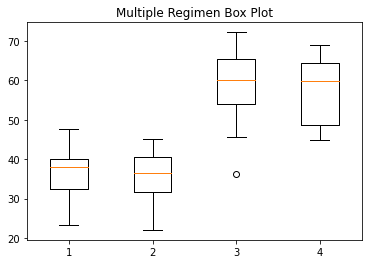

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [t_vol_Capomulin, t_vol_Ramicane,t_vol_Infubinol, t_vol_Ceftamin]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Regimen Box Plot')
ax7.boxplot(data)

plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

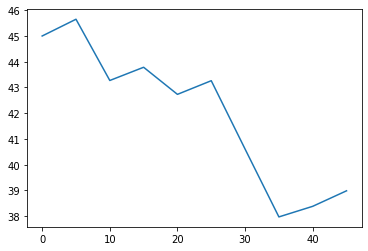

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_b128 = data_df.loc[data_df['Mouse ID'] == 'b128']
plt.plot(df_b128['Timepoint'],df_b128['Tumor Volume (mm3)'])
plt.show

Text(0, 0.5, 'Weight (g)')

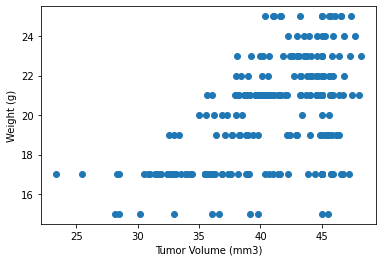

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
plt.scatter(Capomulin_df['Tumor Volume (mm3)'], Capomulin_df['Weight (g)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.2763600223455914


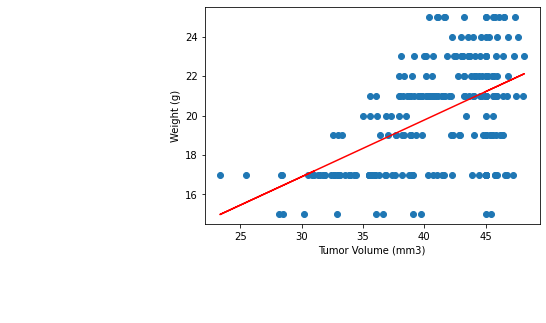

In [35]:
x_values = Capomulin_df['Tumor Volume (mm3)']
y_values = Capomulin_df['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
